## Predict Talent Migration with Machine Learning - 05 Final Take Model B

---

<p style="text-align: center;">
Project split into 5 Notebooks:</br>
</br>
Predict Talent Migration with Machine Learning - 01 Exploratory Analysis</br>
*</br>
Predict Talent Migration with Machine Learning - 02 Modeling</br>
*</br>
Predict Talent Migration with Machine Learning - 03 Grid Build</br>
*</br>
Predict Talent Migration with Machine Learning - 04 Final Take Model A</br>
*</br>
Predict Talent Migration with Machine Learning - 05 Final Take Model B</br> </p> 
         
---

This project aims to create a machine learning model that allows the prediction of employees departure from an Organization. </br>
We will focus our forecast on the Organization's best employees (Top Performers), although a comparison between employees in general will be made. Top Performers will be identified through the creation of a condition, which will be based on the classification of employees evaluation cycles. An analysis on model performance will also be presented, concerning the model's ability to predict the employees departure by **Generation** and **Gender.**

Employees are evaluated on a semiannual basis and our data concerns the last 3 evaluation cycles, between January 1st 2018 to September 31st 2019.

Ratings per evaluation are: </br>

  - Mid Year 2018 (MY2018): **0,1,2,3,4,5** </br>
  - Year End 2018 (YE2018): **0,1,2,3,4,5** </br>
  - Mid Year 2019: **0,1,2,3***.</br>
             
**Data from the Organization shows a change of ratings scale was purpousely made to decrease results granularity.*

In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, PowerTransformer, OneHotEncoder

from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance

from category_encoders.ordinal import OrdinalEncoder

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

## Data:

**The best models parameters results after GridSearch CV were chosen as the main models to finally fit our Test dataset and provide us with final findings. As we have been doing, we have 2 models, one with and another without the overestimating features previously identified.** 

**This notebook will go over the model B - without overestimating features.**

---

In [2]:
df = pd.read_csv('projeto_final.csv', index_col = False)

In [3]:
X = df.copy()

In [4]:
y = df.pop('Out')

## Train - Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
X_train.shape

(4504, 46)

In [7]:
y_train.shape

(4504,)

In [8]:
X_test.shape

(1126, 46)

Validação:

In [9]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.2)

---

## Best model without overestimating Features:

Initial Take:

In [10]:
transf = ColumnTransformer(
    [('cat', OrdinalEncoder(), ['Generation', 'Gender', 'MProximity', 'Rehire', 'Contract Type', 'PeopleManager', 'Country', 'CostCenterH', 'TopPerformer']),
     ('null', SimpleImputer (missing_values= np.nan, strategy = 'median'), ['PayIncrease', 'Age']), 
     ('other', "passthrough", ['Tenure', 'Dependents', 'EmployeeCount', 'HireCount', 'MTenure', 'HomeOffice'])
    ])


In [11]:
model = Pipeline([
    ('Feature Eng', transf),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 9))
])

In [12]:
results_take_inicial = cross_val_score(model, X_train, y_train, cv = KFold(n_splits = 5, shuffle = True), scoring = "roc_auc")
results_take_inicial_mean = results_take_inicial.mean()
results_take_inicial_std = results_take_inicial.std()

In [13]:
results_take_inicial_mean

0.8978816580080846

In [14]:
results_take_inicial_std

0.013128739900578383

In [15]:
model.fit(X_train_, y_train_)

Pipeline(steps=[('Feature Eng',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['Generation', 'Gender',
                                                   'MProximity', 'Rehire',
                                                   'Contract Type',
                                                   'PeopleManager', 'Country',
                                                   'CostCenterH',
                                                   'TopPerformer']),
                                                 ('null',
                                                  SimpleImputer(strategy='median'),
                                                  ['PayIncrease', 'Age']),
                                                 ('other', 'passthrough',
                                                  ['Tenure', 'Dependents',
                                                   'EmployeeCount', 'HireCount',
              

## Feature Importance: 

In [16]:
results = permutation_importance(model, X_val, y_val, scoring='roc_auc')

importance = results.importances_mean

In [17]:
for f,s in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (f,s))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00151
Feature: 2, Score: 0.00105
Feature: 3, Score: 0.00183
Feature: 4, Score: 0.00693
Feature: 5, Score: 0.00152
Feature: 6, Score: 0.00247
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.03653
Feature: 9, Score: 0.06859
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.04813
Feature: 12, Score: 0.03438
Feature: 13, Score: 0.01115
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.05760
Feature: 18, Score: 0.10517
Feature: 19, Score: -0.00026
Feature: 20, Score: 0.04574
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
F

In [18]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 4270 to 5416
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                901 non-null    int64  
 1   Rehire            901 non-null    object 
 2   Age               896 non-null    float64
 3   Generation        901 non-null    object 
 4   CostCenterH       901 non-null    object 
 5   Gender            901 non-null    object 
 6   Dependents        901 non-null    int64  
 7   ManagementLevel   901 non-null    object 
 8   EmployeeCount     901 non-null    int64  
 9   HireCount         901 non-null    int64  
 10  TerminationCount  901 non-null    int64  
 11  Tenure            901 non-null    int64  
 12  PayIncrease       888 non-null    float64
 13  PeopleManager     901 non-null    object 
 14  BLeave            901 non-null    object 
 15  BTimeOut          901 non-null    object 
 16  ParentLeave       901 non-null    object

In [19]:
f_imp = pd.Series(importance, name = 'Features Importances')

In [20]:
f_imp

0     0.000000
1     0.001509
2     0.001053
3     0.001834
4     0.006927
5     0.001524
6     0.002471
7     0.000000
8     0.036531
9     0.068590
10    0.000000
11    0.048130
12    0.034381
13    0.011147
14    0.000000
15    0.000000
16    0.000000
17    0.057603
18    0.105174
19   -0.000262
20    0.045742
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.008653
38    0.000000
39    0.000000
40    0.000000
41    0.000000
42    0.000000
43    0.000000
44    0.000000
45    0.010732
Name: Features Importances, dtype: float64

---

**Filter by the Features actually used in the model:**

In [37]:
f_imp_used = f_imp[f_imp != 0]

In [38]:
f_imp_used.sort_values(ascending = False)

18    0.105174
9     0.068590
17    0.057603
11    0.048130
20    0.045742
8     0.036531
12    0.034381
13    0.011147
45    0.010732
37    0.008653
4     0.006927
6     0.002471
3     0.001834
5     0.001524
1     0.001509
2     0.001053
19   -0.000262
Name: Features Importances, dtype: float64

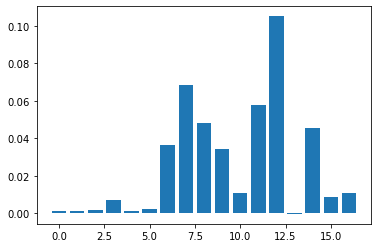

In [39]:
pyplot.bar([x for x in range(len(f_imp_used))], f_imp_used)
pyplot.show()

---

## Take 2:

**Remove the less important Features from the model.**

**Withdrawals:** 'Gender' - 'Dependents' - 'MProximity' - 'Rehire' - 'Generation'

In [24]:
transf_v2 = ColumnTransformer(
    [('cat', OrdinalEncoder(), ['Contract Type', 'PeopleManager', 'Country', 'CostCenterH', 'TopPerformer']),
     ('null', SimpleImputer (missing_values= np.nan, strategy = 'median'), ['PayIncrease', 'Age']), 
     ('other', "passthrough", ['Tenure', 'EmployeeCount', 'HireCount', 'MTenure', 'HomeOffice'])
    ])


In [25]:
model_v2 = Pipeline([
    ('Feature Eng', transf_v2),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 9))
])

In [26]:
model_v2.fit(X_train, y_train)

Pipeline(steps=[('Feature Eng',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['Contract Type',
                                                   'PeopleManager', 'Country',
                                                   'CostCenterH',
                                                   'TopPerformer']),
                                                 ('null',
                                                  SimpleImputer(strategy='median'),
                                                  ['PayIncrease', 'Age']),
                                                 ('other', 'passthrough',
                                                  ['Tenure', 'EmployeeCount',
                                                   'HireCount', 'MTenure',
                                                   'HomeOffice'])])),
                ('Gradient Boosting', GradientBoostingClassifier(max_depth=9))])

## Plot roc curve:

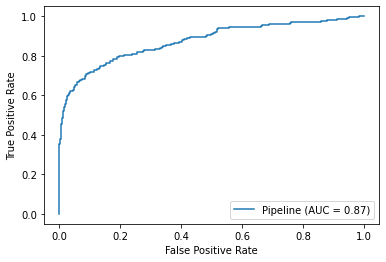

In [27]:
model_v2_disp = plot_roc_curve(model_v2, X_test, y_test)

**As expected the overall model B performance is lower than model A as it does not contain the identified overestimating features. Nevertheless it still presents encouraging results, also considering the fact that it is less complex when it comes to number of features used to build it. Less complexity and still high enough AUC is a positive outcome.**

---

### Evaluate the model for TopPerformers vs Non TopPerformer

In [28]:
X_test.shape

(1126, 46)

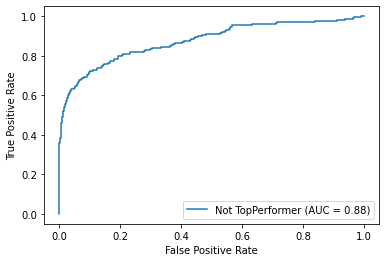

In [29]:
model_v2_ntp = plot_roc_curve(model_v2, X_test[X_test['TopPerformer']== 0], y_test[X_test[X_test['TopPerformer'] == 0].index.values], name = 'Not TopPerformer')

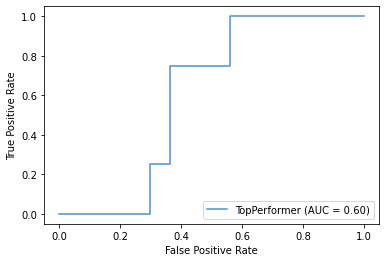

In [30]:
ax = pyplot.gca()
model_v2_tp = plot_roc_curve(model_v2, X_test[X_test['TopPerformer']== 1], y_test[X_test[X_test['TopPerformer'] == 1].index.values], name = 'TopPerformer', ax=ax, alpha=0.8)

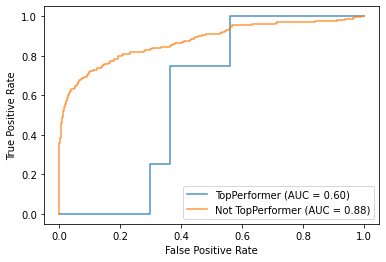

In [31]:
ax = pyplot.gca()
model_v2_tp = plot_roc_curve(model_v2, X_test[X_test['TopPerformer']== 1], y_test[X_test[X_test['TopPerformer'] == 1].index.values], name = 'TopPerformer', ax=ax, alpha=0.8)
model_v2_ntp.plot(ax=ax, alpha=0.8)

**When prediticting general employees vs Top Performers employees migration, our model B is clearly best at predicting the first. This may be explained by the low sampling of valid performance evaluation cycles data present in the dataset, which ultimately allowed for reduced number of Top Performers identification, when compared with general employees information.**

---

### By Gender:

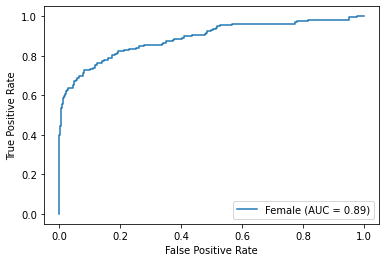

In [32]:
model_v2_fem = plot_roc_curve(model_v2, X_test[X_test['Gender']== 'Female'], y_test[X_test[X_test['Gender'] == 'Female'].index.values], name = 'Female')

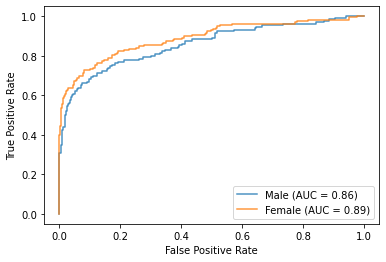

In [33]:
ax_v2 = pyplot.gca()
model_v2_male = plot_roc_curve(model_v2, X_test[X_test['Gender']== 'Male'], y_test[X_test[X_test['Gender'] == 'Male'].index.values], name = 'Male', ax=ax_v2, alpha=0.8)
model_v2_fem.plot(ax=ax_v2, alpha=0.8)


**As model A, model B also presents similar performance when filtered by Gender, being slightly better at predicting Female employees migration.**

---

### By Generation:

In [34]:
X_test['Generation'].unique()

array(['Generation X (1965 -1980)',
       'Generation Y / Millennials (1981 -1996)',
       'Generation Z (1997 and onwards)', 'Not Available',
       'Baby Boomers (1946 -1964)'], dtype=object)

**Generation Baby Boomers removed due to reduced sampling:**

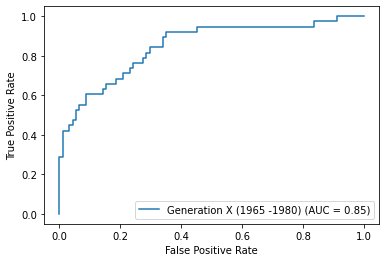

In [35]:
model_v2_gx = plot_roc_curve(model_v2, X_test[X_test['Generation']== 'Generation X (1965 -1980)'], y_test[X_test[X_test['Generation'] == 'Generation X (1965 -1980)'].index.values], name ='Generation X (1965 -1980)')

# model_v2_bb = plot_roc_curve(model_v2, X_test[X_test['Generation']== 'Baby Boomers (1946 -1964)'], y_test[X_test[X_test['Generation'] == 'Baby Boomers (1946 -1964)'].index.values], name = 'Baby Boomers (1946 -1964)')

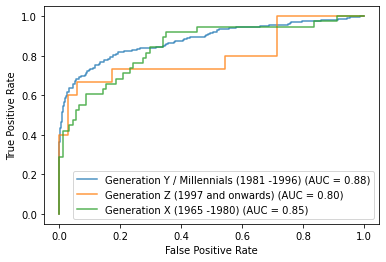

In [36]:
ax_v3 = pyplot.gca()
model_v2_gy = plot_roc_curve(model_v2, X_test[X_test['Generation']== 'Generation Y / Millennials (1981 -1996)'], y_test[X_test[X_test['Generation'] == 'Generation Y / Millennials (1981 -1996)'].index.values], name ='Generation Y / Millennials (1981 -1996)', ax=ax_v3, alpha=0.8)
model_v2_gz = plot_roc_curve(model_v2, X_test[X_test['Generation']== 'Generation Z (1997 and onwards)'], y_test[X_test[X_test['Generation'] == 'Generation Z (1997 and onwards)'].index.values], name ='Generation Z (1997 and onwards)', ax=ax_v3, alpha=0.8)


model_v2_gx.plot(ax=ax_v3, alpha=0.8)


**Looking at model B performance at predicting employees migration by Generation, contrary to model A, it is best at predicting migration of Generation Y/ Millennials employees from the Organization. This is especially interesting because it is a critical Generation for the short term survival of any Organization's teams. Being able to predict this Generation employees helps Organizations tackle specific needs/challenges beforehand and benefit from already significantly aquired millenials experience retention in their Organization.**